In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import AdaBoostClassifier as ada
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DT
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/OnlineNewsPopularity.csv")

0.8

In [ ]:
numeric_columns = data.iloc[:,:-1].select_dtypes(include=['number'])

scaler = StandardScaler()
data.iloc[:,:-1][numeric_columns.columns] = scaler.fit_transform(numeric_columns)
cor = data.iloc[:,:-1].corr()
cor_feat = set()
for i in range(len(cor.columns)):
  for j in range(i):
    if abs(cor.iloc[i, j]) > 0.8:
      colname = cor.columns[i]
      cor_feat.add(colname)
print(len(cor_feat))
data = data.drop(columns=list(cor_feat), axis = 1)


<ipython-input-4-168a56b8d3f7>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.iloc[:,:-1].corr()


7


In [ ]:
data = data.drop(columns=["url", " timedelta"])
# data = data.drop(columns=["url", " timedelta", " n_non_stop_words", " n_non_stop_unique_tokens", " kw_max_min", " kw_max_max", ])

In [ ]:
data.shape

(39644, 52)

In [ ]:
for i in range(data.shape[0]):
    if data[' shares'][i] < 1400: # 2800
        data[' shares'][i] = 0
    else:
        data[' shares'][i] = 1

<ipython-input-7-73f71b4ff312>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[' shares'][i] = 0
<ipython-input-7-73f71b4ff312>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[' shares'][i] = 1


In [ ]:
data

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,0


In [ ]:
data.keys()

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

In [ ]:
# sb.kdeplot(data=data[' kw_max_avg'], fill=True)
# plt.title('KDE Plot for Feature: kw_max_avg')
# plt.xlabel('Feature Values')
# plt.ylabel('Density')
# plt.show()

In [ ]:
# Q1 = data[" kw_max_avg"].quantile(0.25)
# Q3 = data[" kw_max_avg"].quantile(0.75)

# IQR = Q3 - Q1
# low = Q1 - 1.5 * IQR
# high = Q3 + 1.5 * IQR

In [ ]:
# data = data[(data[" kw_max_avg"] >= low) & (data[" kw_max_avg"] <= high)]

In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
x.shape, y.shape

((39644, 51), (39644,))

In [ ]:
# import xgboost as xgb

# model = xgb.XGBRegressor()
# model.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
import lightgbm as lgb

model = lgb.LGBMRegressor()
# model = gbc()
model.fit(x, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6919
[LightGBM] [Info] Number of data points in the train set: 39644, number of used features: 51
[LightGBM] [Info] Start training from score 0.533599


LGBMRegressor()

In [ ]:
# import plotly.graph_objects as go

# importance_dict = model.get_booster().get_fscore()
# features, importance = zip(*importance_dict.items())

# # Sort features by importance
# sorted_idx = np.argsort(importance)
# features = np.array(features)[sorted_idx]
# importance = np.array(importance)[sorted_idx]

# # Select top N features for better readability
# top_n = 20
# features = features[-top_n:]
# importance = importance[-top_n:]

# # Create a Plotly bar chart
# fig = go.Figure()
# fig.add_trace(go.Bar(x=importance, y=features, orientation='h'))
# fig.update_layout(title='Feature Importance', xaxis_title='F-Score', yaxis_title='Features')
# fig.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

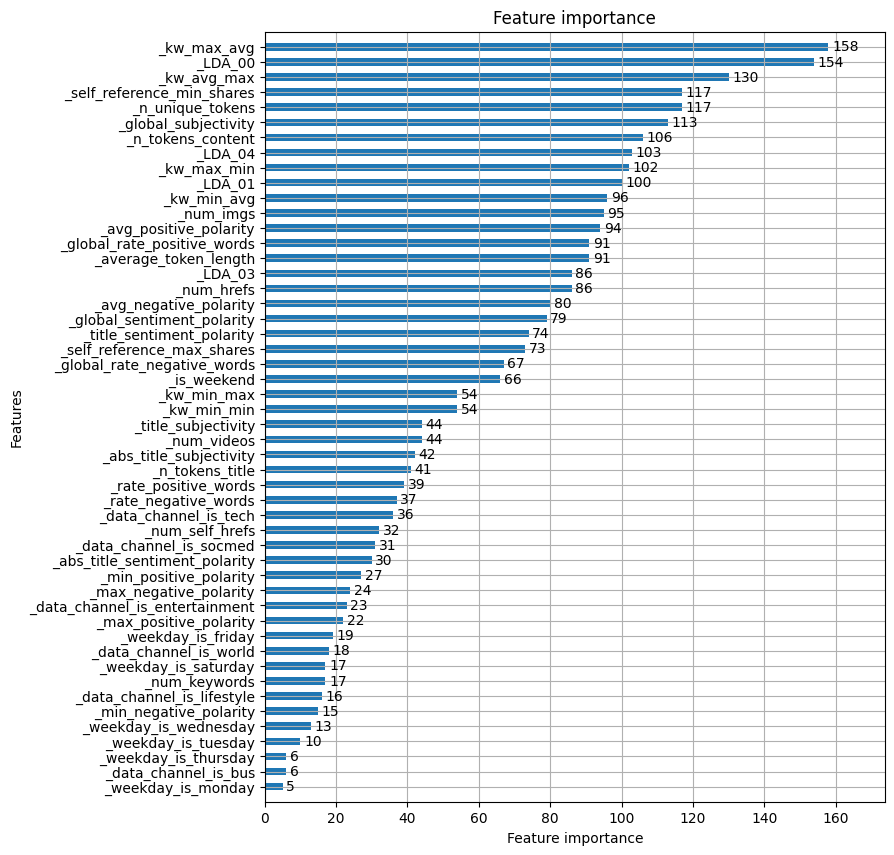

In [ ]:
lgb.plot_importance(model, height=0.5, figsize=(8,10))

In [ ]:
feature_importances = model.feature_importances_

# Create a DataFrame to associate feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Extract the top 20 features
features = feature_importance_df.head(20)['Feature'].tolist()

In [ ]:
features = np.append(features, ' shares')

In [ ]:
df = data[features]

In [ ]:
df.head()

,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,kw_avg_max,kw_avg_avg,n_unique_tokens,kw_avg_min,kw_max_avg,n_non_stop_words,num_hrefs,...,global_subjectivity,LDA_03,LDA_02,kw_max_min,LDA_00,average_token_length,avg_positive_polarity,num_imgs,avg_negative_polarity,shares
0,496.0,496.0,496.000000,0.0,0.0,0.663594,0.0,0.0,1.0,4.0,...,0.521617,0.041263,0.040005,0.0,0.500331,4.680365,0.378636,1.0,-0.350000,593
1,0.0,0.0,0.000000,0.0,0.0,0.604743,0.0,0.0,1.0,3.0,...,0.341246,0.050101,0.050096,0.0,0.799756,4.913725,0.286915,1.0,-0.118750,711
2,918.0,918.0,918.000000,0.0,0.0,0.575130,0.0,0.0,1.0,3.0,...,0.702222,0.033334,0.033351,0.0,0.217792,4.393365,0.495833,1.0,-0.466667,1500
3,0.0,0.0,0.000000,0.0,0.0,0.503788,0.0,0.0,1.0,9.0,...,0.429850,0.028905,0.494651,0.0,0.028573,4.404896,0.385965,1.0,-0.369697,1200
4,545.0,16000.0,3151.157895,0.0,0.0,0.415646,0.0,0.0,1.0,19.0,...,0.513502,0.028572,0.028575,0.0,0.028633,4.682836,0.411127,20.0,-0.220192,505


In [ ]:
df.shape

(39644, 21)

In [ ]:
# for i in range(df.shape[0]):
#     if df[' shares'][i] < 1400:
#         df[' shares'][i] = 0
#     else:
#         df[' shares'][i] = 1

<ipython-input-320-cca0d890a10a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-320-cca0d890a10a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# x = df.values[:,:-1]
# y = df.values[:,-1]

x = data.values[:,:-1]
y = data.values[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [ ]:
# pca = PCA(n_components=30)
# pca_train = pca.fit_transform(x_train)
# pca_test = pca.transform(x_test)

In [ ]:
# km = KMeans(n_clusters=10)

# km_train = km.fit_predict(x_train)
# km_train = np.c_[x_train, km_train]
# km_test = km.predict(x_test)
# km_test = np.c_[x_test, km_test]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# n_components = 10
# svd = TruncatedSVD(n_components=n_components)
# svd_train = svd.fit_transform(x_train)
# x_svd_train = np.c_[x_train, svd_train]
# svd_test = svd.fit_transform(x_test)
# x_svd_test = np.c_[x_test, svd_test]

In [ ]:
x_train.shape

(31715, 58)

In [ ]:
# mic = MIC(x, y)

In [ ]:
# mic = pd.Series(mic)
# mic.index = x.columns

In [ ]:
# l = mic.sort_values(ascending=False)
# l

In [ ]:
# l.keys()

In [ ]:
# x_train = pd.DataFrame(x_train, columns=x.keys())
# x_test = pd.DataFrame(x_test, columns=x.keys())

In [ ]:
# x_mod_train = x_train.loc[:,list(l.keys()[:20])].values
# x_mod_test = x_test.loc[:,list(l.keys()[:20])].values

In [ ]:
# lr = LR(max_iter=10000)
# lr.fit(x_train, y_train)
# y1 = lr.predict(x_train)
# y2 = lr.predict(x_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.6432602869304745, 0.6336234077437256)

In [ ]:
# lr = LR(max_iter=10000)
# lr.fit(x_svd_train, y_train)
# y1 = lr.predict(x_svd_train)
# y2 = lr.predict(x_svd_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.6556834305533659, 0.6405599697313659)

In [ ]:
# lr = LR(max_iter=10000)
# lr.fit(km_train, y_train)
# y1 = lr.predict(km_train)
# y2 = lr.predict(km_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.6304903042724262, 0.623786101652163)

In [ ]:
# lr = LR(max_iter=10000)
# lr.fit(pca_train, y_train)
# y1 = lr.predict(pca_train)
# y2 = lr.predict(pca_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.6448368279993694, 0.6362719132299155)

In [ ]:
# lr = LR(max_iter=10000)
# lr.fit(km_pca_train, y_train)
# y1 = lr.predict(km_pca_train)
# y2 = lr.predict(km_pca_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.644931420463503, 0.6365241518476479)

In [ ]:
# params = {'penalty' : ['l1', 'l2', 'elasticnet'], 'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [ ]:
# grid = GridSearchCV(estimator=LR(max_iter=10000, random_state=42), param_grid=params, cv=5, scoring='accuracy')

In [ ]:
# grid.fit(x_train, y_train)

In [ ]:
# best_param = grid.best_params_
# best_param

In [ ]:
# best_model = grid.best_estimator_
# y_pred = best_model.predict(x_train)

# print(accuracy_score(y_train, y_pred))

In [ ]:
# best_model = grid.best_estimator_
# y_pred = best_model.predict(x_test)

# print(accuracy_score(y_test, y_pred))

In [ ]:
# mlp = MLPClassifier(hidden_layer_sizes=(20, 50, 30), learning_rate_init=0.1)
# mlp.fit(x_train, y_train)
# y1 = mlp.predict(x_train)
# y2 = mlp.predict(x_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.5976036575752799, 0.5859503089923067)

In [ ]:
# mlp = MLPClassifier(hidden_layer_sizes=(100, 70, 32), learning_rate_init=0.1)
# mlp.fit(x_svd_train, y_train)
# y1 = mlp.predict(x_svd_train)
# y2 = mlp.predict(x_svd_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



(0.9539019391455147, 0.5709421112372304)

In [ ]:
# mlp = MLPClassifier(hidden_layer_sizes=(20, 50), learning_rate_init=0.1)
# mlp.fit(km_train, y_train)
# y1 = mlp.predict(km_train)
# y2 = mlp.predict(km_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.6654895160018919, 0.6485054861899356)

In [ ]:
# import pickle
# filename = 'finalized_model.sav'
# pickle.dump(mlp, open(filename, 'wb'))

In [ ]:
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [ ]:
# mlp = MLPClassifier(hidden_layer_sizes=(20, 50, 30), learning_rate_init=0.1)
# mlp.fit(km_pca_train, y_train)
# y1 = mlp.predict(km_pca_train)
# y2 = mlp.predict(km_pca_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.5359924326028693, 0.5240257283390087)

(0.6552419990540753, 0.6512801109849918) n_estimators=200

In [ ]:
# bag = BaggingClassifier(LR(max_iter=10000), n_estimators=200)
# bag.fit(x_train, y_train)
# y1 = bag.predict(x_train)
# y2 = bag.predict(x_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.6440800882862998, 0.6348846008323874)

In [ ]:
# bag = BaggingClassifier(LR(max_iter=10000), n_estimators=200)
# bag.fit(x_svd_train, y_train)
# y1 = bag.predict(x_svd_train)
# y2 = bag.predict(x_svd_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.6561563928740344, 0.6314793794930004)

In [ ]:
# bag = BaggingClassifier(LR(max_iter=10000), n_estimators=200)
# bag.fit(pca_train, y_train)
# y1 = bag.predict(pca_train)
# y2 = bag.predict(pca_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.6453413211414157, 0.6358935553033169)

In [ ]:
# bag = BaggingClassifier(LR(max_iter=10000), n_estimators=200)
# bag.fit(km_train, y_train)
# y1 = bag.predict(km_train)
# y2 = bag.predict(km_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.6551158757685638, 0.6512801109849918)

In [ ]:
# bag = BaggingClassifier(LR(max_iter=10000), n_estimators=200)
# bag.fit(km_pca_train, y_train)
# y1 = bag.predict(km_pca_train)
# y2 = bag.predict(km_pca_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.6448683588207473, 0.6358935553033169)

In [ ]:
# bag = BaggingClassifier(MLPClassifier(hidden_layer_sizes=(30, 100, 20)), n_estimators=4)

In [ ]:
# bag.fit(x_train, y_train)

In [ ]:
# y_pred = bag.predict(x_train)
# accuracy_score(y_train, y_pred)

In [ ]:
# y_pred = bag.predict(x_test)
# accuracy_score(y_test, y_pred)

In [ ]:
# rf = RF(n_estimators=500)
# rf.fit(x_train, y_train)
# y_pred = rf.predict(x_train)
# accuracy_score(y_train, y_pred)
# y_pred = rf.predict(x_test)
# accuracy_score(y_test, y_pred)

In [1]:
# boost = ada(LR(max_iter=10000), n_estimators=50)
# boost.fit(x_train, y_train)
# y_pred = boost.predict(x_train)
# accuracy_score(y_train, y_pred)
# y_pred = boost.predict(x_test)
# accuracy_score(y_test, y_pred)

67.1

In [ ]:
# boost = gbc(n_estimators=300)
# boost.fit(x_train, y_train)
# y1 = boost.predict(x_train)
# y2 = boost.predict(x_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.7089705186820117, 0.660108462605625)

In [ ]:
# boost = gbc(n_estimators=300)
# boost.fit(pca_train, y_train)
# y1 = boost.predict(pca_train)
# y2 = boost.predict(pca_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.6968942140942772, 0.6472442931012738)

In [ ]:
# boost = gbc(n_estimators=100)
# boost.fit(km_train, y_train)
# y1 = boost.predict(km_train)
# y2 = boost.predict(km_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.6681696358190131, 0.6472442931012738)

In [ ]:
# boost = gbc(n_estimators=100)
# boost.fit(km_pca_train, y_train)
# y1 = boost.predict(km_pca_train)
# y2 = boost.predict(km_pca_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.6720794576698723, 0.6389204187161054)

In [ ]:
# bag = BaggingClassifier(gbc(n_estimators=100), n_estimators=100)

In [ ]:
# bag.fit(x_train, y_train)

In [ ]:
# y_pred = bag.predict(x_train)
# accuracy_score(y_train, y_pred)

In [ ]:
# y_pred = bag.predict(x_test)
# accuracy_score(y_test, y_pred)

In [ ]:
# tree = DT()
# tree.fit(x_train, y_train)
# y1 = tree.predict(x_train)
# y2 = tree.predict(x_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(1.0, 0.5801488207844621)

In [ ]:
# tree = DT()
# tree.fit(pca_train, y_train)
# y1 = tree.predict(pca_train)
# y2 = tree.predict(pca_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(1.0, 0.5584562996594779)

In [ ]:
# tree = DT()
# tree.fit(km_train, y_train)
# y1 = tree.predict(km_train)
# y2 = tree.predict(km_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(1.0, 0.5831756841972506)

In [ ]:
# tree = DT()
# tree.fit(km_pca_train, y_train)
# y1 = tree.predict(km_pca_train)
# y2 = tree.predict(km_pca_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(1.0, 0.5627443561609282)

In [ ]:
# svc = SVC(C=10)

In [ ]:
# svc.fit(x_train, y_train)

In [ ]:
# from sklearn.metrics import accuracy_score
# y_pred = svc.predict(x_train)
# accuracy_score(y_train, y_pred)

In [ ]:
# y_pred = svc.predict(x_test)
# accuracy_score(y_test, y_pred)

In [ ]:
# svc = SVC(C=10, gamma=0.01)

# svc.fit(x_train, y_train)
# y1 = svc.predict(x_train)
# y2 = svc.predict(x_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)

(0.7379473435282989, 0.6464875772480767)

In [ ]:
# base_classifiers = [
#     ('rf', RF(n_estimators=100, max_depth=5, random_state=42)),
#     ('gb', gbc(n_estimators=100, learning_rate=0.1, random_state=42)),
# ]


# meta_classifier = LR(C=1.0, solver='lbfgs', max_iter=200)


# stacking_classifier = StackingClassifier(
#     estimators=base_classifiers,
#     final_estimator=meta_classifier,
#     stack_method='auto',
#     passthrough=False,
#     cv=5
# )



# stack = StackingClassifier(
#     estimators=base_classifiers,
#     final_estimator=LR(),
#     cv=5
# )

# stack.fit(x_train, y_train)

# y1 = stack.predict(x_train)
# y2 = stack.predict(x_test)
# accuracy_score(y_train, y1), accuracy_score(y_test, y2)